In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Verileri yükleyin
satis_verisi = pd.read_csv("satis_verisi_5000.csv")
musteri_verisi = pd.read_csv("musteri_verisi_5000_utf8.csv")

In [73]:
satis_verisi.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724


In [74]:
musteri_verisi.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70
2,3902,Candeniz,Erkek,61,Konya,867.20
3,2080,Gözel,Erkek,64,Adana,2020.97
4,7901,Erdogan,Kadın,63,İstanbul,4334.16


In [75]:
# Gereksiz sütunları kaldır
satis_verisi.drop(columns=['Unnamed: 0'], inplace=True)

In [76]:
# Eksik değerleri analiz edin
print("Satış Verisi Eksik Değerler:")
print(satis_verisi.isnull().sum())
print('*' * 60)

print("\nMüşteri Verisi Eksik Değerler:")
print(musteri_verisi.isnull().sum())

Satış Verisi Eksik Değerler:
tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64
************************************************************

Müşteri Verisi Eksik Değerler:
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64


In [77]:
# Satış verisinin genel bilgisi
print("Satış Verisi Bilgisi:")
print(satis_verisi.info())
print('*' * 60)

# Sütunların genel özet istatistikleri
print("\nSatış Verisi Özet İstatistikleri:")
print(satis_verisi.describe(include='all'))
print('*' * 60)

# Müşteri verisinin genel bilgisi
print("\nMüşteri Verisi Bilgisi:")
print(musteri_verisi.info())
print('*' * 60)

# Müşteri verisinin özet istatistikleri
print("\nMüşteri Verisi Özet İstatistikleri:")
print(musteri_verisi.describe(include='all'))

Satış Verisi Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tarih         5000 non-null   object
 1   ürün_kodu     5000 non-null   object
 2   ürün_adi      5000 non-null   object
 3   kategori      5000 non-null   object
 4   fiyat         5000 non-null   object
 5   adet          5000 non-null   int64 
 6   toplam_satis  5000 non-null   object
 7   musteri_id    5000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 312.6+ KB
None
************************************************************

Satış Verisi Özet İstatistikleri:
             tarih ürün_kodu ürün_adi    kategori   fiyat         adet  \
count         5000      5000     5000        5000    5000  5000.000000   
unique         731        10       10           5    4907          NaN   
top     2024-04-27      P011    Kalem  Elektronik  565.35          NaN   
fre

## **Görev 1 : Veri Temizleme ve Manipülasyonu**

### **Eksik ve Hatalı Değerlerin Analizi**
Veri setlerindeki eksik ve hatalı değerleri tespit edildi:

* "fiyat" ve "toplam_satis" sütunlarında object türünde hatalı değerler bulundu.
* "tarih" sütununun datetime formatına dönüştürülmesi gerektiğini fark edildi.

In [78]:
# Eksik ve hatalı değerleri tespit et
print("Fiyat Sütununda Sayı Olmayan Değerler:")
print(satis_verisi[~satis_verisi['fiyat'].str.replace('.', '', 1).str.isdigit()])
print('*' * 60)

print("\nToplam Satış Sütununda Sayı Olmayan Değerler:")
print(satis_verisi[~satis_verisi['toplam_satis'].str.replace('.', '', 1).str.isdigit()])

Fiyat Sütununda Sayı Olmayan Değerler:
           tarih ürün_kodu    ürün_adi         kategori                fiyat  \
159   2023-10-23      P018     Telefon       Elektronik  2024-07-11 00:00:00   
195   2023-05-18      P063       Klima       Elektronik  1935-07-01 00:00:00   
217   2023-03-23      P018     Telefon       Elektronik  1989-07-01 00:00:00   
250   2023-09-13      P032       Mouse       Elektronik  1969-11-01 00:00:00   
485   2024-10-30      P010       Çanta            Giyim  1983-09-01 00:00:00   
566   2024-05-03      P011       Kalem        Kırtasiye  1936-12-01 00:00:00   
656   2023-12-30      P063       Klima       Elektronik  2016-07-01 00:00:00   
726   2024-04-11      P011       Kalem        Kırtasiye  2024-05-20 00:00:00   
746   2024-05-24      P087    Kulaklık       Elektronik  1977-11-01 00:00:00   
766   2024-09-12      P010       Çanta            Giyim  2024-05-30 00:00:00   
770   2024-09-30      P010       Çanta            Giyim  2028-05-01 00:00:00   
7

### **Veri Türlerini Düzeltme**


*   "fiyat" ve "toplam_satis" sütunlarını float türüne dönüştürüldü.
*   Hatalı değerler dönüşüm sırasında NaN olarak işaretlendi.
"tarih" sütunu datetime formatına dönüştürüldü.




In [79]:
# Tür dönüşümleri
satis_verisi['fiyat'] = pd.to_numeric(satis_verisi['fiyat'], errors='coerce')
satis_verisi['toplam_satis'] = pd.to_numeric(satis_verisi['toplam_satis'], errors='coerce')
satis_verisi['tarih'] = pd.to_datetime(satis_verisi['tarih'], errors='coerce')

###  **"Toplam Satış" Sütunundaki Hataları Düzeltme**
* fiyat * adet = toplam_satis kuralına göre tüm değerleri kontrol edildi ve hatalı olanları düzeltildi.
* Büyük veri setleri için optimize edilmiş, vektörize bir işlem kullanıldı.

In [80]:
# Gerçek toplam satışları yeniden hesapla
gercek_toplam_satis = satis_verisi['fiyat'] * satis_verisi['adet']

# Hatalı toplam_satis değerlerini düzelt
satis_verisi['toplam_satis'] = satis_verisi['toplam_satis'].where(
    satis_verisi['toplam_satis'] == gercek_toplam_satis,
    gercek_toplam_satis
)

# Hatalı değerler düzeltildikten sonra kontrol
print("\nToplam Satış Sütunu Düzeltildi:")
print(satis_verisi[['fiyat', 'adet', 'toplam_satis']].head())


Toplam Satış Sütunu Düzeltildi:
     fiyat  adet  toplam_satis
0  1207.30    13      15694.90
1   237.14    16       3794.24
2  1024.29     9       9218.61
3  1477.88     9      13300.92
4   949.43    19      18039.17


### **Eksik Verilerin Kategorilere Göre Doldurulması**
* Eksik değerleri kategorilere göre doldurmak için, her kategoriye ait "fiyat" ve "toplam_satis" sütunlarının ortalama değerlerini kullanıldı.
* Hatalı veya eksik verileri mantıklı tahminlerle dolduruldu.

In [81]:
# Kategorilere göre ortalama hesapla
kategori_ortalama = satis_verisi.groupby('kategori')[['fiyat', 'toplam_satis']].mean()

# Eksik değerleri kategorilere göre doldurma fonksiyonu
def fill_missing_values(row):
    if pd.isnull(row['fiyat']):
        row['fiyat'] = kategori_ortalama.loc[row['kategori'], 'fiyat']
    if pd.isnull(row['toplam_satis']):
        row['toplam_satis'] = kategori_ortalama.loc[row['kategori'], 'toplam_satis']
    return row

satis_verisi_cleaned = satis_verisi.apply(fill_missing_values, axis=1)

In [82]:
print(kategori_ortalama)

                      fiyat  toplam_satis
kategori                                 
Elektronik       747.164013   7500.679830
Ev Aletleri      779.332322   7931.736004
Giyim            750.164950   7717.842366
Kırtasiye        744.468939   7453.434321
Mutfak Ürünleri  717.586420   7316.443132


### **Verilerin birleştirilmesi**

Tüm müşteri verilerini koruyarak müşteri ve satış verilerini birleştirmek için musteri_id üzerinden left join yöntemi kullanıldı. Bu yöntem, müşteri veri setindeki tüm satırları korur ve eşleşmeyen satırlarda eksik değerler (NaN) bırakır.

In [83]:
# Satış ve müşteri verilerini musteri_id üzerinden birleştir (left join)
genis_veri_seti = musteri_verisi.merge(satis_verisi, on='musteri_id', how='left')

# Birleştirilen veri setinin özetini kontrol et
print("Birleştirilen Veri Seti (İlk 5 Satır):")
print(genis_veri_seti.head())

# Eksik verilerin olup olmadığını kontrol et
print("\nEksik Veri Kontrolü:")
print(genis_veri_seti.isnull().sum())

Birleştirilen Veri Seti (İlk 5 Satır):
   musteri_id      isim cinsiyet  yas      sehir  harcama_miktari      tarih  \
0        4353  Gülşahin    Kadın   57  Gaziantep          2726.01        NaT   
1        8374  Yahşikan    Erkek   66  Gaziantep          4754.70        NaT   
2        3902  Candeniz    Erkek   61      Konya           867.20 2024-01-10   
3        3902  Candeniz    Erkek   61      Konya           867.20 2024-06-06   
4        2080     Gözel    Erkek   64      Adana          2020.97 2023-03-24   

  ürün_kodu   ürün_adi         kategori    fiyat  adet  toplam_satis  
0       NaN        NaN              NaN      NaN   NaN           NaN  
1       NaN        NaN              NaN      NaN   NaN           NaN  
2      P097  Su Şişesi  Mutfak Ürünleri   898.53  18.0      16173.54  
3      P087   Kulaklık       Elektronik   508.58   6.0       3051.48  
4      P037      Fırın      Ev Aletleri  1454.80   5.0       7274.00  

Eksik Veri Kontrolü:
musteri_id            0
isim    

* Eksik değerlerin bulunduğu müşteri kayıtları, satış verisiyle eşleşmemiş.
* Bu, o müşterilerin hiçbir alışveriş yapmadığını veya satış veri setinde eksiklikler olduğunu gösteriyor olabilir.
* fiyat, adet, toplam_satis: Eksik olduğu durumlarda 0 olarak dolduruldu.

In [84]:
# Eksik değerleri doldurma
genis_veri_seti['fiyat'] = genis_veri_seti['fiyat'].fillna(0)
genis_veri_seti['adet'] = genis_veri_seti['adet'].fillna(0)
genis_veri_seti['toplam_satis'] = genis_veri_seti['toplam_satis'].fillna(0)

In [85]:
genis_veri_seti

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01,NaT,NaN,NaN,NaN,0.00,0.0,0.00
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70,NaT,NaN,NaN,NaN,0.00,0.0,0.00
2,3902,Candeniz,Erkek,61,Konya,867.20,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18.0,16173.54
3,3902,Candeniz,Erkek,61,Konya,867.20,2024-06-06,P087,Kulaklık,Elektronik,508.58,6.0,3051.48
4,2080,Gözel,Erkek,64,Adana,2020.97,2023-03-24,P037,Fırın,Ev Aletleri,1454.80,5.0,7274.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,4829,Razı,Erkek,38,Bursa,2918.32,2023-07-22,P082,Defter,Kırtasiye,720.37,9.0,6483.33
6849,3411,Selâtin,Kadın,68,Ankara,4699.02,2024-01-17,P032,Mouse,Elektronik,529.29,18.0,9527.22
6850,4030,Nurtaç,Erkek,60,İzmir,3316.69,2024-10-04,P037,Fırın,Ev Aletleri,516.20,5.0,2581.00
6851,1874,Almus,Kadın,63,Bursa,3069.48,NaT,NaN,NaN,NaN,0.00,0.0,0.00


## **Görev 2: Zaman Serisi Analizi**

### **Haftalık ve Aylık Satış Analizi**

Karşılaşılabilecek olumsuzluk --->  Gruplama Uyumsuzluğu:

---
Haftalık veriler Pazartesi başlangıçlı (W-Mon), aylık veriler ise tam takvim ayına göre (M) hesaplanıyor. Bu yüzden satış grafikleri farklılık gösterebilir.

In [86]:
# Haftalık toplam satışları hesapla
haftalik_satis = satis_verisi.resample('W-Mon', on='tarih')['toplam_satis'].sum().reset_index()
haftalik_satis.columns = ['hafta', 'toplam_satis']

# Aylık toplam satışları hesapla
aylik_satis = satis_verisi.resample('M', on='tarih')['toplam_satis'].sum().reset_index()
aylik_satis.columns = ['ay', 'toplam_satis']

# Sonuçları kontrol et
print("Haftalık Toplam Satışlar:")
print(haftalik_satis.head())
print('*' * 60)

print("\nAylık Toplam Satışlar:")
print(aylik_satis.head())

Haftalık Toplam Satışlar:
       hafta  toplam_satis
0 2022-11-07      61323.49
1 2022-11-14     315871.47
2 2022-11-21     333039.43
3 2022-11-28     307180.43
4 2022-12-05     367450.98
************************************************************

Aylık Toplam Satışlar:
          ay  toplam_satis
0 2022-11-30    1121547.19
1 2022-12-31    1712474.63
2 2023-01-31    1422786.33
3 2023-02-28    1471603.95
4 2023-03-31    1832608.11


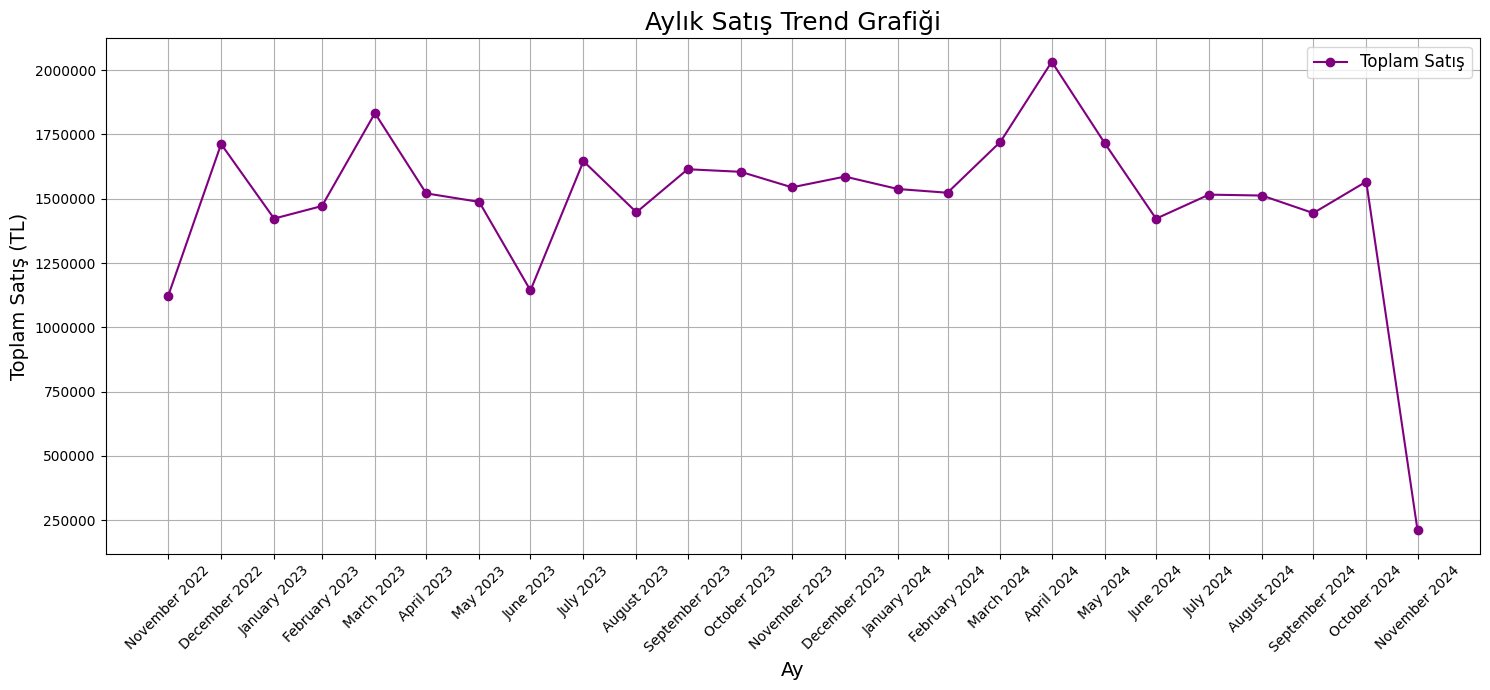

In [87]:
import matplotlib.pyplot as plt

# Ensure monthly sales data is sorted by date
aylik_satis['ay'] = pd.to_datetime(aylik_satis['ay'].astype(str))
aylik_satis = aylik_satis.sort_values('ay')

# Plot the monthly sales trend
plt.figure(figsize=(15, 7))
plt.plot(aylik_satis['ay'], aylik_satis['toplam_satis'], marker='o', linestyle='-', color='purple', label='Toplam Satış')

# Add title and labels
plt.title('Aylık Satış Trend Grafiği', fontsize=18)
plt.xlabel('Ay', fontsize=14)
plt.ylabel('Toplam Satış (TL)', fontsize=14)

# Format y-axis to show values in TL
plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_xticks(aylik_satis['ay'])
plt.gca().set_xticklabels(aylik_satis['ay'].dt.strftime('%B %Y'), rotation=45, fontsize=10)

# Add grid, legend, and layout adjustments
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

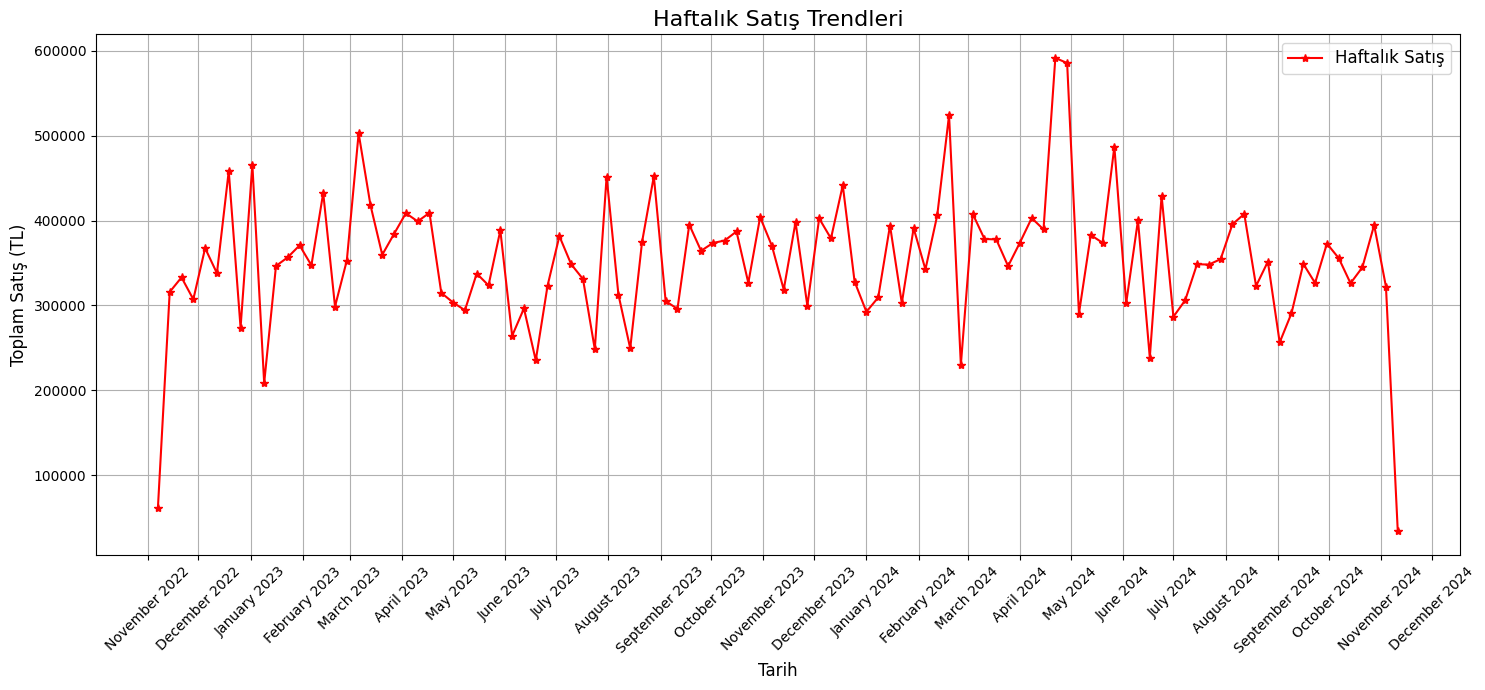

In [88]:
import matplotlib.dates as mdates

# Haftalık satış grafiği için x ekseninde ayları işaretleme
plt.figure(figsize=(15, 7))

# Haftalık toplam satışları çiz
plt.plot(haftalik_satis['hafta'], haftalik_satis['toplam_satis'], marker='*', linestyle='-', color='red', label='Haftalık Satış')

# Başlık ve etiketler
plt.title('Haftalık Satış Trendleri', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Toplam Satış (TL)', fontsize=12)

# X ekseninde sadece ay başlangıçlarını göster
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Ay başlangıçlarına göre yerleşim
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Ay ve yıl formatında gösterim

# X eksenindeki etiketleri döndür
plt.xticks(rotation=45, fontsize=10)

# Grid ve diğer ayarlar
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Grafiği göster
plt.show()

### **Ayın İlk ve Son Satış Günlerini Belirleme**

In [89]:
# İlk ve son satış günlerini belirle
ilk_satis_gunu = (
    satis_verisi.groupby(satis_verisi['tarih'].dt.to_period('M'))
    .agg(ilk_satis_gunu=('tarih', 'min'))
    .reset_index()
)

son_satis_gunu = (
    satis_verisi.groupby(satis_verisi['tarih'].dt.to_period('M'))
    .agg(son_satis_gunu=('tarih', 'max'))
    .reset_index()
)

# İlk ve son günlerin gün isimlerini ekle
ilk_satis_gunu['ilk_satis_gunu'] = ilk_satis_gunu['ilk_satis_gunu'].dt.day_name()
son_satis_gunu['son_satis_gunu'] = son_satis_gunu['son_satis_gunu'].dt.day_name()

# İlk ve son günleri birleştirme
aylik_satis_gunleri = pd.merge(ilk_satis_gunu, son_satis_gunu, on='tarih')

# Sonuçları kontrol et
print("Her Ayın İlk ve Son Satış Günleri:")
print(aylik_satis_gunleri.head())

Her Ayın İlk ve Son Satış Günleri:
     tarih ilk_satis_gunu son_satis_gunu
0  2022-11         Sunday      Wednesday
1  2022-12       Thursday       Saturday
2  2023-01         Sunday        Tuesday
3  2023-02      Wednesday        Tuesday
4  2023-03      Wednesday         Friday


In [90]:
aylik_satis_gunleri

,tarih,ilk_satis_gunu,son_satis_gunu
0,2022-11,Sunday,Wednesday
1,2022-12,Thursday,Saturday
2,2023-01,Sunday,Tuesday
3,2023-02,Wednesday,Tuesday
4,2023-03,Wednesday,Friday
5,2023-04,Saturday,Sunday
6,2023-05,Monday,Wednesday
7,2023-06,Thursday,Friday
8,2023-07,Saturday,Monday
9,2023-08,Tuesday,Thursday


In [91]:
first_day_counts = aylik_satis_gunleri['ilk_satis_gunu'].value_counts()

# Calculate the frequency of each last sales day.
last_day_counts = aylik_satis_gunleri['son_satis_gunu'].value_counts()

# Print the results.
print("Frequency of first sales days: \n ", first_day_counts)
print("\nFrequency of last sales days: \n", last_day_counts)

Frequency of first sales days: 
  ilk_satis_gunu
Sunday       4
Thursday     4
Wednesday    4
Monday       4
Friday       4
Saturday     3
Tuesday      2
Name: count, dtype: int64

Frequency of last sales days: 
 son_satis_gunu
Tuesday      5
Wednesday    4
Sunday       4
Thursday     4
Saturday     3
Friday       3
Monday       2
Name: count, dtype: int64


In [92]:
# Ürün bazında haftalık toplam satış
haftalik_urun_satis = (
    satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('W-Mon'), 'ürün_adi'])['adet']
    .sum()
    .reset_index()
)
haftalik_urun_satis.columns = ['hafta', 'ürün_adi', 'toplam_adet']

# Ürün bazında aylık toplam satış
aylik_urun_satis = (
    satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('M'), 'ürün_adi'])['adet']
    .sum()
    .reset_index()
)
aylik_urun_satis.columns = ['ay', 'ürün_adi', 'toplam_adet']

# Sonuçları kontrol et
print("Ürün Bazında Haftalık Toplam Satış:")
print(haftalik_urun_satis.head())

print("\nÜrün Bazında Aylık Toplam Satış:")
print(aylik_urun_satis.head())

Ürün Bazında Haftalık Toplam Satış:
                   hafta    ürün_adi  toplam_adet
0  2022-11-01/2022-11-07  Bilgisayar           12
1  2022-11-01/2022-11-07       Kalem           18
2  2022-11-01/2022-11-07       Klima            6
3  2022-11-01/2022-11-07    Kulaklık           10
4  2022-11-01/2022-11-07       Mouse           15

Ürün Bazında Aylık Toplam Satış:
        ay    ürün_adi  toplam_adet
0  2022-11  Bilgisayar          116
1  2022-11      Defter          211
2  2022-11       Fırın          140
3  2022-11       Kalem          149
4  2022-11       Klima          149


In [93]:
haftalik_urun_satis

,hafta,ürün_adi,toplam_adet
0,2022-11-01/2022-11-07,Bilgisayar,12
1,2022-11-01/2022-11-07,Kalem,18
2,2022-11-01/2022-11-07,Klima,6
3,2022-11-01/2022-11-07,Kulaklık,10
4,2022-11-01/2022-11-07,Mouse,15
...,...,...,...
1036,2024-10-29/2024-11-04,Telefon,11
1037,2024-10-29/2024-11-04,Çanta,49
1038,2024-11-05/2024-11-11,Kalem,15
1039,2024-11-05/2024-11-11,Klima,17


In [94]:
# Haftalık toplam ürün adedi
haftalik_toplam_urun = (
    satis_verisi.groupby(satis_verisi['tarih'].dt.to_period('W-Mon'))['adet']
    .sum()
    .reset_index()
)
haftalik_toplam_urun.columns = ['hafta', 'toplam_adet']

# Sonuçları kontrol et
print("Her Hafta Satılan Toplam Ürün Sayısı:")
print(haftalik_toplam_urun.head())

Her Hafta Satılan Toplam Ürün Sayısı:
                   hafta  toplam_adet
0  2022-11-01/2022-11-07          129
1  2022-11-08/2022-11-14          437
2  2022-11-15/2022-11-21          450
3  2022-11-22/2022-11-28          444
4  2022-11-29/2022-12-05          502


In [95]:
haftalik_toplam_urun

,hafta,toplam_adet
0,2022-11-01/2022-11-07,129
1,2022-11-08/2022-11-14,437
2,2022-11-15/2022-11-21,450
3,2022-11-22/2022-11-28,444
4,2022-11-29/2022-12-05,502
...,...,...
101,2024-10-08/2024-10-14,581
102,2024-10-15/2024-10-21,445
103,2024-10-22/2024-10-28,615
104,2024-10-29/2024-11-04,433


In [96]:
en_cok_satan = (
    haftalik_urun_satis.groupby('ürün_adi')['toplam_adet'].sum()
    .sort_values(ascending=False)
)
print(en_cok_satan)

ürün_adi
Kalem         5300
Su Şişesi     5259
Çanta         5253
Telefon       5244
Defter        5202
Mouse         5061
Kulaklık      4938
Fırın         4833
Klima         4684
Bilgisayar    4585
Name: toplam_adet, dtype: int64


In [97]:
# Benzersiz ürün sayısını bulma
unique_urun_sayisi = satis_verisi['ürün_adi'].nunique()
print(f"Satış veri setinde toplam {unique_urun_sayisi} farklı ürün var.")

Satış veri setinde toplam 10 farklı ürün var.


In [98]:
# Benzersiz ürünlerin listesini almak
unique_urunler = satis_verisi['ürün_adi'].unique()
print("Benzersiz ürünler:", unique_urunler)

Benzersiz ürünler: ['Mouse' 'Kalem' 'Bilgisayar' 'Klima' 'Fırın' 'Defter' 'Çanta' 'Su Şişesi'
 'Kulaklık' 'Telefon']


In [99]:
# Ürün bazında toplam satış miktarını hesaplama
urun_toplam_satis = satis_verisi.groupby('ürün_adi')['adet'].sum().sort_values(ascending=False)
urun_toplam_satis_df = urun_toplam_satis.reset_index()

print("Ürün Bazında Toplam Satış Miktarı:")
urun_toplam_satis_df

Ürün Bazında Toplam Satış Miktarı:


,ürün_adi,adet
0,Kalem,5300
1,Su Şişesi,5259
2,Çanta,5253
3,Telefon,5244
4,Defter,5202
5,Mouse,5061
6,Kulaklık,4938
7,Fırın,4833
8,Klima,4684
9,Bilgisayar,4585


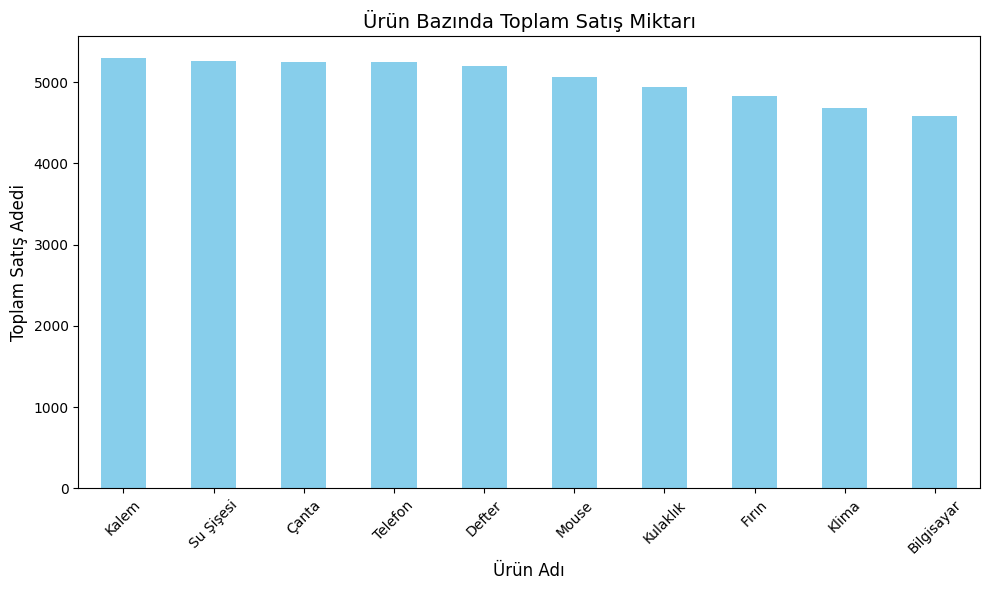

In [100]:
# Ürün bazında toplam satış grafiği
plt.figure(figsize=(10, 6))
urun_toplam_satis.plot(kind='bar', color='skyblue')
plt.title("Ürün Bazında Toplam Satış Miktarı", fontsize=14)
plt.xlabel("Ürün Adı", fontsize=12)
plt.ylabel("Toplam Satış Adedi", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
# Ürün bazında haftalık toplam satış trendi
haftalik_urun_trend = (
    satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('W-Mon'), 'ürün_adi'])['adet']
    .sum()
    .reset_index()
)

# Sonuçları kontrol et
print("Ürün Bazında Haftalık Satış Trendleri:")
print(haftalik_urun_trend.head())

Ürün Bazında Haftalık Satış Trendleri:
                   tarih    ürün_adi  adet
0  2022-11-01/2022-11-07  Bilgisayar    12
1  2022-11-01/2022-11-07       Kalem    18
2  2022-11-01/2022-11-07       Klima     6
3  2022-11-01/2022-11-07    Kulaklık    10
4  2022-11-01/2022-11-07       Mouse    15


In [102]:
haftalik_urun_trend

,tarih,ürün_adi,adet
0,2022-11-01/2022-11-07,Bilgisayar,12
1,2022-11-01/2022-11-07,Kalem,18
2,2022-11-01/2022-11-07,Klima,6
3,2022-11-01/2022-11-07,Kulaklık,10
4,2022-11-01/2022-11-07,Mouse,15
...,...,...,...
1036,2024-10-29/2024-11-04,Telefon,11
1037,2024-10-29/2024-11-04,Çanta,49
1038,2024-11-05/2024-11-11,Kalem,15
1039,2024-11-05/2024-11-11,Klima,17


In [103]:
# En çok ve en az satan ürünler
en_cok_satan = urun_toplam_satis.idxmax()
en_az_satan = urun_toplam_satis.idxmin()

print(f"En çok satan ürün: {en_cok_satan} ({urun_toplam_satis.max()} adet)")
print(f"En az satan ürün: {en_az_satan} ({urun_toplam_satis.min()} adet)")

En çok satan ürün: Kalem (5300 adet)
En az satan ürün: Bilgisayar (4585 adet)


In [104]:
urun_satis_performansi = satis_verisi.groupby('ürün_adi')['adet'].sum().reset_index()
urun_satis_performansi = urun_satis_performansi.sort_values(by='adet', ascending=False)

print("Ürünlerin toplam satış performansı:")
print(urun_satis_performansi)

Ürünlerin toplam satış performansı:
     ürün_adi  adet
3       Kalem  5300
7   Su Şişesi  5259
9       Çanta  5253
8     Telefon  5244
1      Defter  5202
6       Mouse  5061
5    Kulaklık  4938
2       Fırın  4833
4       Klima  4684
0  Bilgisayar  4585


In [105]:
urun_satis_performansi['yuzde'] = (urun_satis_performansi['adet'] / urun_satis_performansi['adet'].sum()) * 100

print("Ürünlerin toplam satış içindeki yüzdesi:")
print(urun_satis_performansi)

Ürünlerin toplam satış içindeki yüzdesi:
     ürün_adi  adet      yuzde
3       Kalem  5300  10.524435
7   Su Şişesi  5259  10.443019
9       Çanta  5253  10.431105
8     Telefon  5244  10.413233
1      Defter  5202  10.329832
6       Mouse  5061  10.049842
5    Kulaklık  4938   9.805596
2       Fırın  4833   9.597093
4       Klima  4684   9.301217
0  Bilgisayar  4585   9.104629


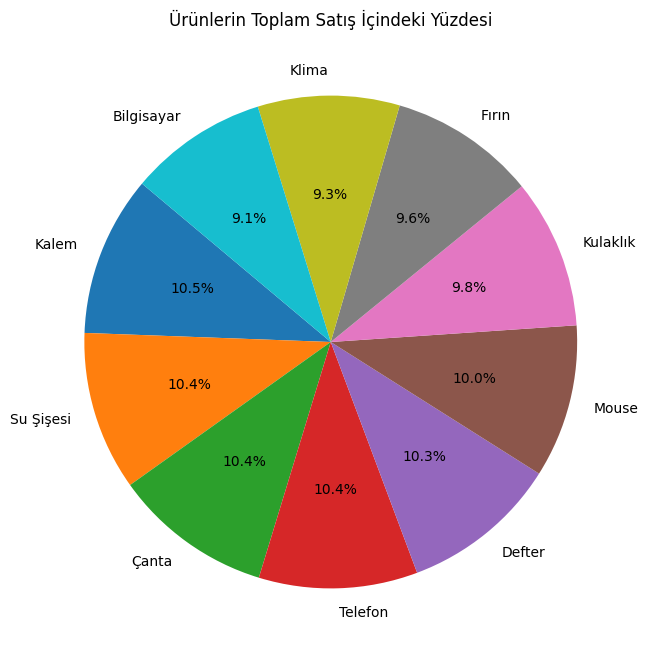

In [106]:
# Pie chart çizimi
plt.figure(figsize=(8, 8))
plt.pie(urun_satis_performansi['yuzde'], labels=urun_satis_performansi['ürün_adi'],
        autopct='%1.1f%%', startangle=140)
plt.title("Ürünlerin Toplam Satış İçindeki Yüzdesi")
plt.show()

In [107]:
aylik_urun_performansi = satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('M'), 'ürün_adi'])['adet'].sum().reset_index()
aylik_urun_performansi.columns = ['ay', 'ürün_adi', 'toplam_adet']

print("Ürünlerin aylık performansı:")

aylik_urun_performansi

Ürünlerin aylık performansı:


,ay,ürün_adi,toplam_adet
0,2022-11,Bilgisayar,116
1,2022-11,Defter,211
2,2022-11,Fırın,140
3,2022-11,Kalem,149
4,2022-11,Klima,149
...,...,...,...
245,2024-11,Kulaklık,27
246,2024-11,Mouse,25
247,2024-11,Su Şişesi,31
248,2024-11,Telefon,11


In [108]:
kategori_satis = satis_verisi.groupby('kategori')['adet'].sum().reset_index()
kategori_satis['yuzde'] = (kategori_satis['adet'] / kategori_satis['adet'].sum()) * 100

print("Kategorilerin toplam satış içindeki yüzdesi:")
print(kategori_satis)

Kategorilerin toplam satış içindeki yüzdesi:
          kategori   adet      yuzde
0       Elektronik  24512  48.674517
1      Ev Aletleri   4833   9.597093
2            Giyim   5253  10.431105
3        Kırtasiye  10502  20.854266
4  Mutfak Ürünleri   5259  10.443019


In [109]:
urun_satis_performansi['kumulatif_yuzde'] = urun_satis_performansi['yuzde'].cumsum()

pareto_urunler = urun_satis_performansi[urun_satis_performansi['kumulatif_yuzde'] <= 80]

print("Satışların %80'ini oluşturan ürünler:")
print(pareto_urunler)

Satışların %80'ini oluşturan ürünler:
    ürün_adi  adet      yuzde  kumulatif_yuzde
3      Kalem  5300  10.524435        10.524435
7  Su Şişesi  5259  10.443019        20.967454
9      Çanta  5253  10.431105        31.398558
8    Telefon  5244  10.413233        41.811791
1     Defter  5202  10.329832        52.141623
6      Mouse  5061  10.049842        62.191465
5   Kulaklık  4938   9.805596        71.997061


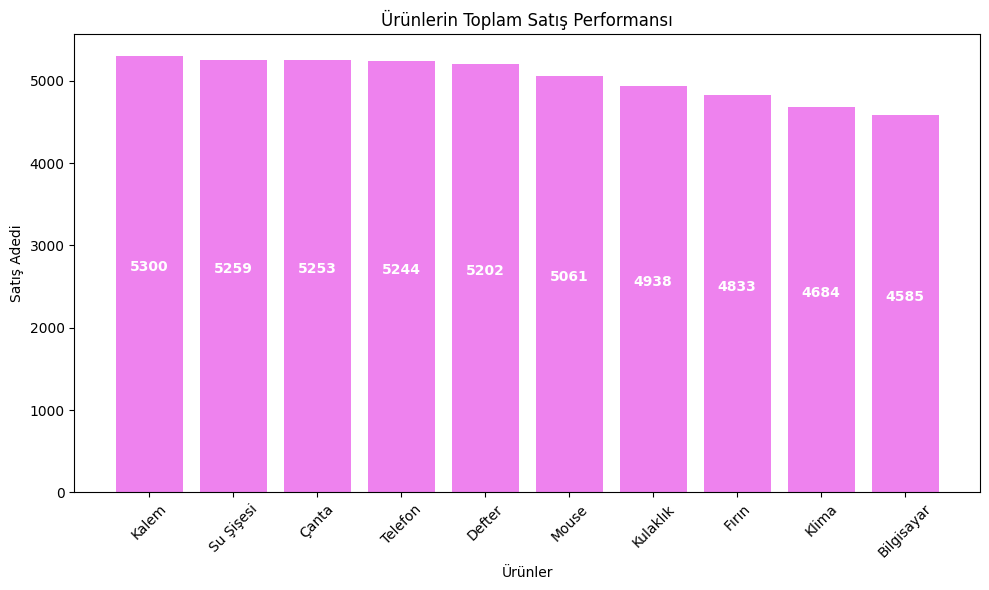

In [110]:
# Ürünlerin toplam satış performansına göre grafik
plt.figure(figsize=(10, 6))
bars = plt.bar(urun_satis_performansi['ürün_adi'], urun_satis_performansi['adet'], color='violet')

# Her bir barın üstüne satış adetlerini ekleyin
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() - (bar.get_height() * 0.50),  # Yüksekliğin %15 altında yaz
             f"{int(bar.get_height())}",
             ha='center',
             va='bottom',
             fontsize=10,
             color='white',
             weight='bold')

# Grafiğin başlık ve etiketlerini ekleyin
plt.title("Ürünlerin Toplam Satış Performansı")
plt.xlabel("Ürünler")
plt.ylabel("Satış Adedi")
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()

## **Görev 3: Kategorisel ve Sayısal Analiz**

### **Ürün Kategorileri Analizi**

In [111]:
# Ürün kategorilerine göre toplam satış miktarı
kategori_satis = satis_verisi.groupby('kategori')['toplam_satis'].sum()

# Toplam satış içindeki oran
kategori_satis_oran = (kategori_satis / kategori_satis.sum()) * 100

print("Kategori Bazında Toplam Satışlar:\n", kategori_satis)
print("\nKategori Bazında Satış Oranları (%):\n", kategori_satis_oran)

Kategori Bazında Toplam Satışlar:
 kategori
Elektronik         18129143.15
Ev Aletleri         3791369.81
Giyim               3882074.71
Kırtasiye           7796292.30
Mutfak Ürünleri     3760651.77
Name: toplam_satis, dtype: float64

Kategori Bazında Satış Oranları (%):
 kategori
Elektronik         48.526152
Ev Aletleri        10.148333
Giyim              10.391123
Kırtasiye          20.868282
Mutfak Ürünleri    10.066111
Name: toplam_satis, dtype: float64


### **Görselleştirme**

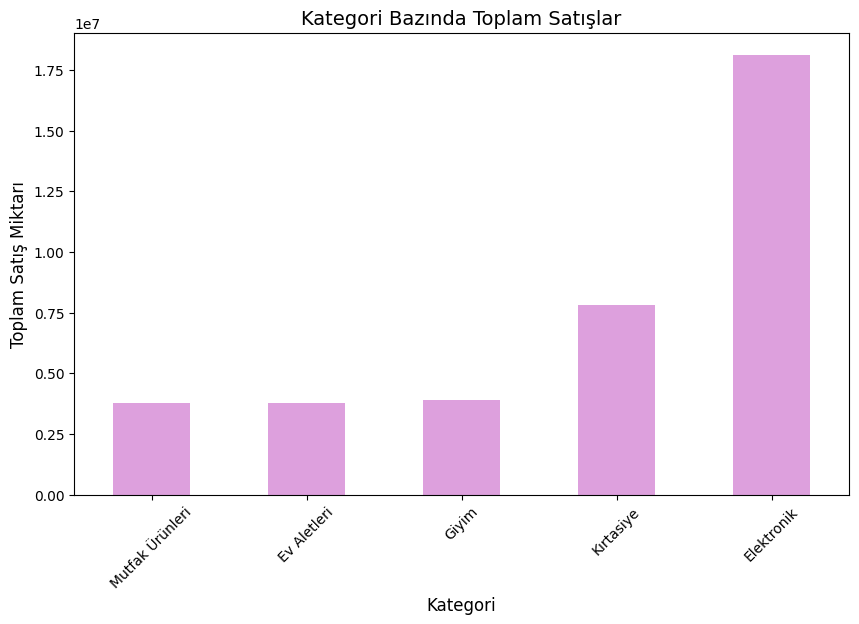

In [112]:
# Görselleştirme için matplotlib
import matplotlib.pyplot as plt

# Çubuk Grafik: Kategori Bazında Toplam Satışlar
plt.figure(figsize=(10, 6))
kategori_satis.sort_values().plot(kind='bar', color='plum')
plt.title("Kategori Bazında Toplam Satışlar", fontsize=14)
plt.ylabel("Toplam Satış Miktarı", fontsize=12)
plt.xlabel("Kategori", fontsize=12)
plt.xticks(rotation=45)
plt.show()

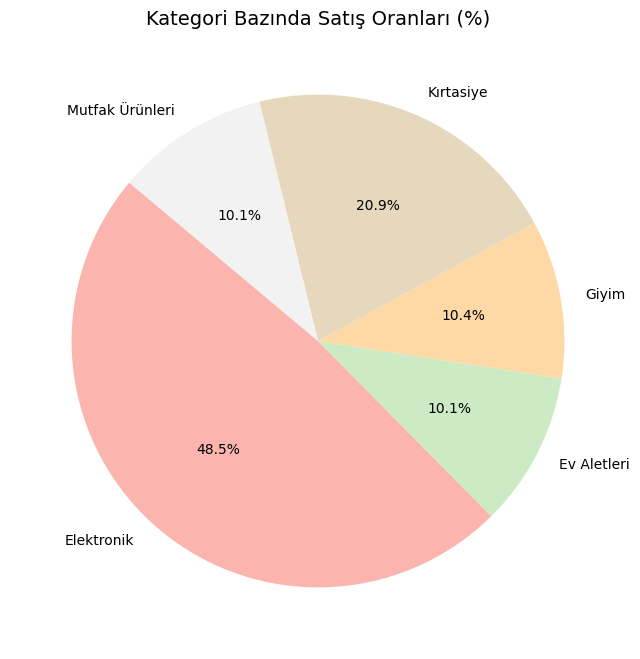

In [113]:
# Pasta Grafiği: Kategori Bazında Satış Oranları
plt.figure(figsize=(8, 8))
kategori_satis_oran.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title("Kategori Bazında Satış Oranları (%)", fontsize=14)
plt.ylabel("")  # Y eksenini kaldırıyoruz
plt.show()

### **Müşteri Yaş Gruplarına Göre Analiz**

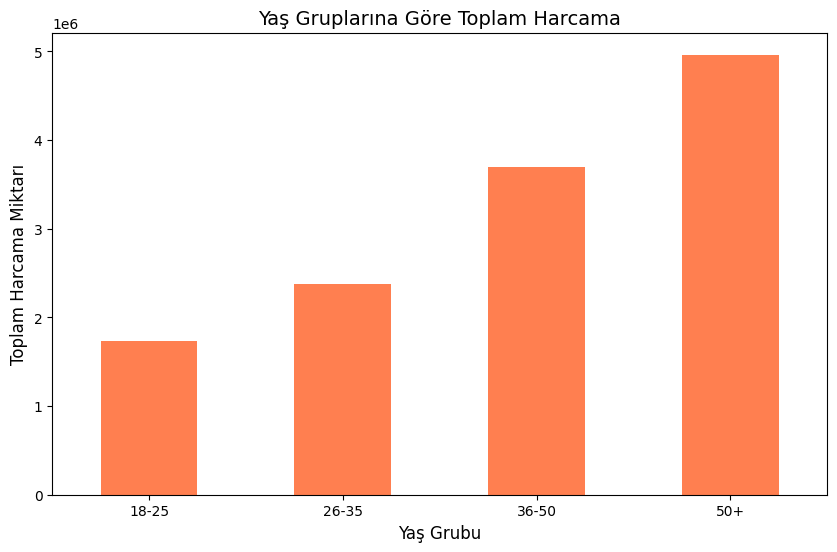

In [114]:
# Yaş gruplarını tanımlayın
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '50+']
musteri_verisi['yas_grubu'] = pd.cut(musteri_verisi['yas'], bins=bins, labels=labels, right=False)

# Yaş gruplarına göre toplam harcama
yas_grubu_harcama = musteri_verisi.groupby('yas_grubu')['harcama_miktari'].sum()

# Çubuk Grafik: Yaş Gruplarına Göre Toplam Harcama
plt.figure(figsize=(10, 6))
yas_grubu_harcama.sort_values().plot(kind='bar', color='coral')
plt.title("Yaş Gruplarına Göre Toplam Harcama", fontsize=14)
plt.ylabel("Toplam Harcama Miktarı", fontsize=12)
plt.xlabel("Yaş Grubu", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### **Cinsiyet Bazında Harcama Analizi**

In [115]:
# Harcama miktarının genel özetine bak
print("Harcama Miktarı Genel Özeti:\n")
print(musteri_verisi['harcama_miktari'].describe())

# Harcama sütunundaki ilk birkaç değeri gözden geçir
print("\nHarcama Miktarı İlk Değerler:\n")
print(musteri_verisi['harcama_miktari'].head())

Harcama Miktarı Genel Özeti:

count    5000.000000
mean     2554.959014
std      1415.329144
min       100.230000
25%      1313.147500
50%      2515.985000
75%      3793.522500
max      4999.440000
Name: harcama_miktari, dtype: float64

Harcama Miktarı İlk Değerler:

0    2726.01
1    4754.70
2     867.20
3    2020.97
4    4334.16
Name: harcama_miktari, dtype: float64


In [116]:
# IQR yöntemine göre aykırı değer sınırları
Q1 = musteri_verisi['harcama_miktari'].quantile(0.25)
Q3 = musteri_verisi['harcama_miktari'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

print(f"Aykırı değer sınırları: Alt = {alt_sinir}, Üst = {ust_sinir}")

# Aykırı değerleri kontrol et
aykiri_veriler = musteri_verisi[(musteri_verisi['harcama_miktari'] < alt_sinir) |
                                (musteri_verisi['harcama_miktari'] > ust_sinir)]

print(f"\nToplam Aykırı Değer Sayısı: {aykiri_veriler.shape[0]}")

Aykırı değer sınırları: Alt = -2407.415, Üst = 7514.085

Toplam Aykırı Değer Sayısı: 0


Cinsiyete Göre Toplam Harcama:
 cinsiyet
Erkek    6351635.09
Kadın    6423159.98
Name: harcama_miktari, dtype: float64


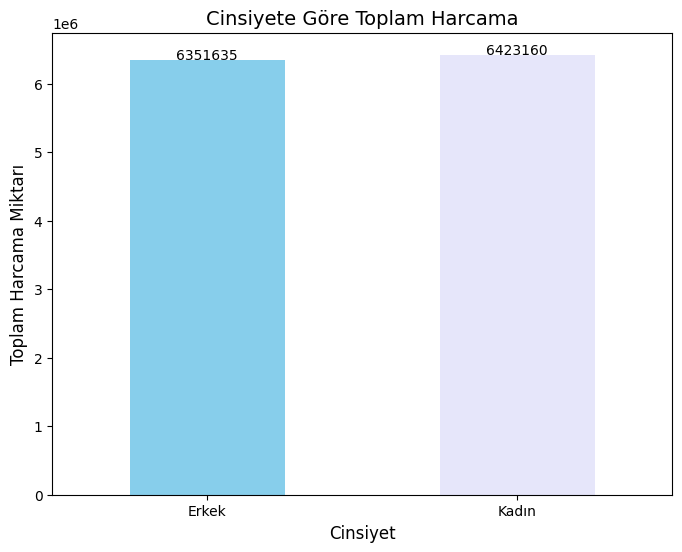

In [117]:
# Cinsiyete göre toplam harcama miktarı
cinsiyet_harcama = musteri_verisi.groupby('cinsiyet')['harcama_miktari'].sum()

print("Cinsiyete Göre Toplam Harcama:\n", cinsiyet_harcama)

plt.figure(figsize=(8, 6))
bars = cinsiyet_harcama.plot(kind='bar', color=['skyblue', 'lavender'])
plt.title("Cinsiyete Göre Toplam Harcama", fontsize=14)
plt.ylabel("Toplam Harcama Miktarı", fontsize=12)
plt.xlabel("Cinsiyet", fontsize=12)
plt.xticks(rotation=0)

for i, value in enumerate(cinsiyet_harcama):
    plt.text(i, value + 50, f"{value:.0f}", ha='center', fontsize=10)
plt.show()

In [118]:
cinsiyet_harcama

,harcama_miktari
cinsiyet,
Erkek,6351635.09
Kadın,6423159.98


In [119]:
# Ürün kategorisi ve cinsiyete göre toplam harcama miktarını hesapla
kategori_cinsiyet_harcama = satis_verisi.merge(musteri_verisi, on='musteri_id',how='inner')
kategori_cinsiyet_harcama = kategori_cinsiyet_harcama.groupby(['kategori', 'cinsiyet'])['toplam_satis'].sum().unstack()

print("Kategori ve Cinsiyete Göre Toplam Harcama:\n", kategori_cinsiyet_harcama)

Kategori ve Cinsiyete Göre Toplam Harcama:
 cinsiyet              Erkek       Kadın
kategori                               
Elektronik       8685344.17  9443798.98
Ev Aletleri      1758512.26  2032857.55
Giyim            2119067.84  1763006.87
Kırtasiye        4058266.41  3738025.89
Mutfak Ürünleri  1879132.67  1881519.10


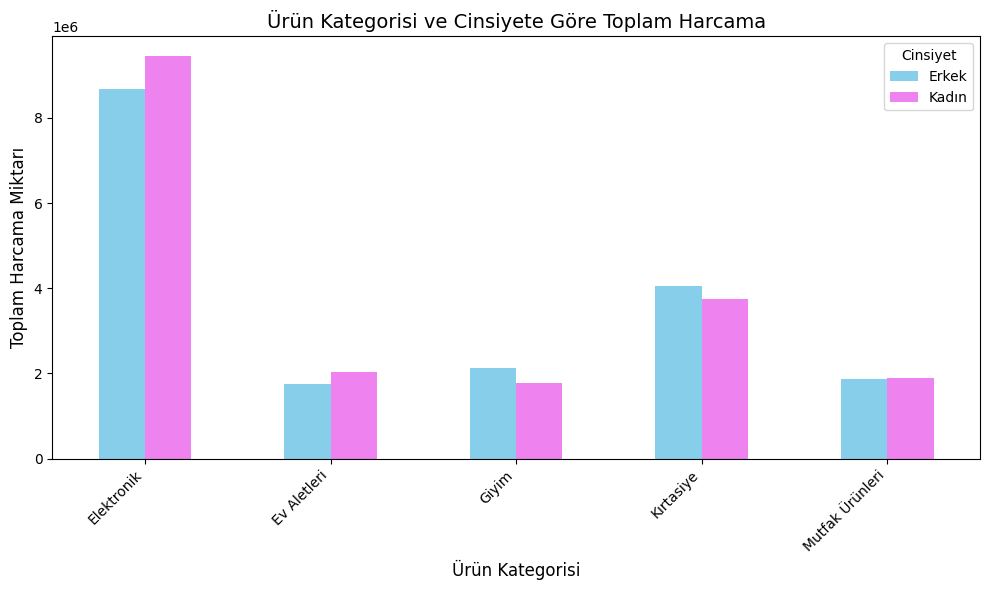

In [120]:
# Çubuk Grafik: Ürün kategorilerine göre kadın ve erkek harcamaları
kategori_cinsiyet_harcama.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'violet'])
plt.title("Ürün Kategorisi ve Cinsiyete Göre Toplam Harcama", fontsize=14)
plt.ylabel("Toplam Harcama Miktarı", fontsize=12)
plt.xlabel("Ürün Kategorisi", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cinsiyet", loc='upper right')
plt.tight_layout()
plt.show()

## **Görev 4: İleri Düzey Veri Manipülasyonu**

### **Şehir Bazında Toplam Harcama Miktarını Hesaplama**

In [121]:
# Şehir bazında toplam harcama miktarını hesaplama
sehir_bazinda_harcama = musteri_verisi.groupby('sehir')['harcama_miktari'].sum().sort_values(ascending=False)
print("Şehir Bazında Toplam Harcama Miktarı:")
print(sehir_bazinda_harcama)

Şehir Bazında Toplam Harcama Miktarı:
sehir
İzmir        1719480.53
Gaziantep    1680765.15
Ankara       1632071.24
Konya        1604023.46
Adana        1567156.27
İstanbul     1544511.23
Bursa        1543966.94
Antalya      1482820.25
Name: harcama_miktari, dtype: float64


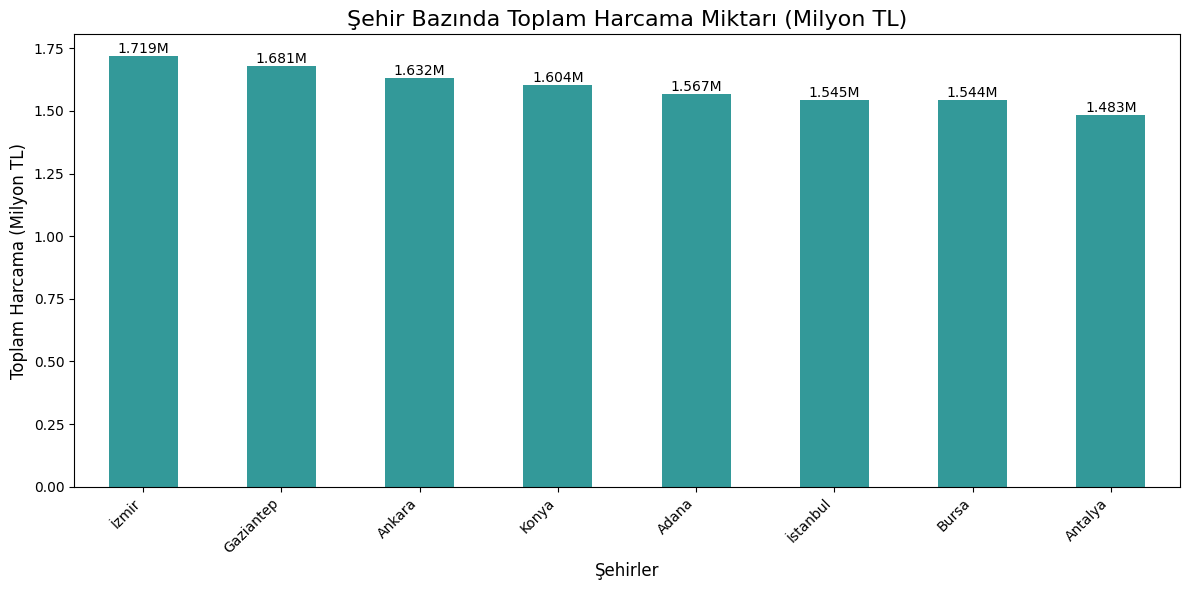

In [122]:
# Harcamaları milyon formatına dönüştür
sehir_bazinda_harcama_sorted = sehir_bazinda_harcama.sort_values(ascending=False)
harcamalar_milyon = sehir_bazinda_harcama_sorted / 1_000_000  # Milyona çevir


plt.figure(figsize=(12, 6))
bars = harcamalar_milyon.plot(kind='bar', color='teal', alpha=0.8)
plt.title("Şehir Bazında Toplam Harcama Miktarı (Milyon TL)", fontsize=16)
for i, value in enumerate(harcamalar_milyon):
    plt.text(
        i,
        value,
        f"{value:.3f}M",  # Ondalık biçimde milyon (örn. 1.72M)
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.xlabel("Şehirler", fontsize=12)
plt.ylabel("Toplam Harcama (Milyon TL)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Her Bir Ürün İçin Ortalama Satış Artış Oranı**

In [123]:
# Aylık bazda ürün satışlarını hesaplama
aylik_urun_satis = satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('M'), 'ürün_adi'])['adet'].sum().reset_index()

# Bir önceki ay ile değişim oranını hesaplama
aylik_urun_satis['adet_lag'] = aylik_urun_satis.groupby('ürün_adi')['adet'].shift(1)
aylik_urun_satis['degisim_orani'] = ((aylik_urun_satis['adet'] - aylik_urun_satis['adet_lag']) / aylik_urun_satis['adet_lag']) * 100

# Ortalama satış artış oranını hesaplama
ortalama_degisim_orani = aylik_urun_satis.groupby('ürün_adi')['degisim_orani'].mean()
ortalama_degisim_orani_df = ortalama_degisim_orani.reset_index()
ortalama_degisim_orani_df.columns = ['Ürün Adı', 'Ortalama Değişim Oranı']

ortalama_degisim_orani_df

,Ürün Adı,Ortalama Değişim Oranı
0,Bilgisayar,16.172751
1,Defter,9.207474
2,Fırın,5.443718
3,Kalem,11.632030
4,Klima,2.130580
5,Kulaklık,6.577236
6,Mouse,4.523185
7,Su Şişesi,2.097570
8,Telefon,-2.015909
9,Çanta,4.617467


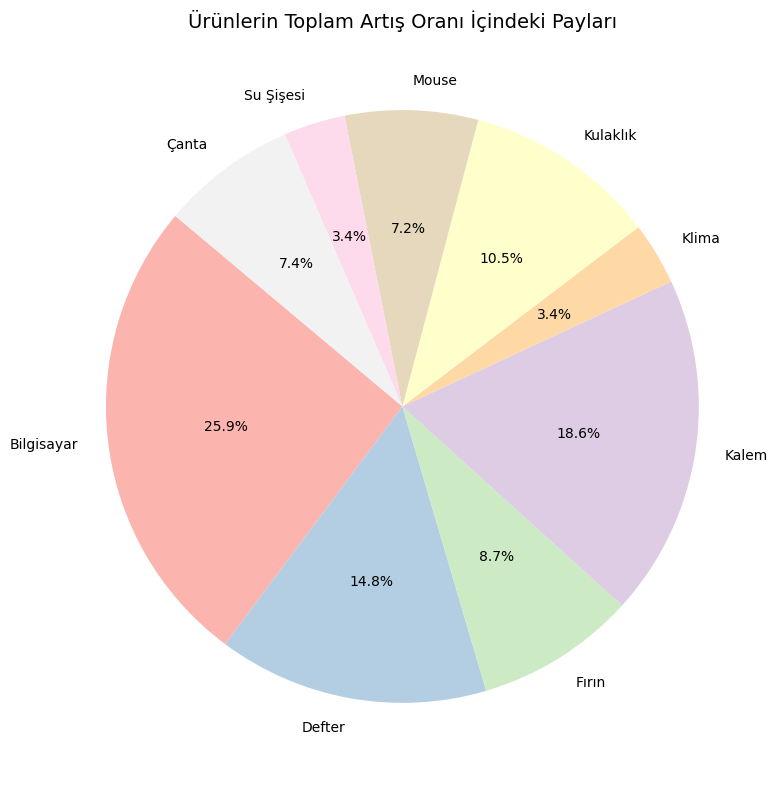

In [124]:
plt.figure(figsize=(8, 8))
ortalama_degisim_orani_pozitif = ortalama_degisim_orani[ortalama_degisim_orani > 0]  # Negatif olanları dışla
ortalama_degisim_orani_pozitif.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title("Ürünlerin Toplam Artış Oranı İçindeki Payları", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

> **NOT** : Telefon satışları azalmıştır. Artış grafiğinde bu yüzden gösterilmiyor. Bu yüzden detaylı bir analiz yaptım.





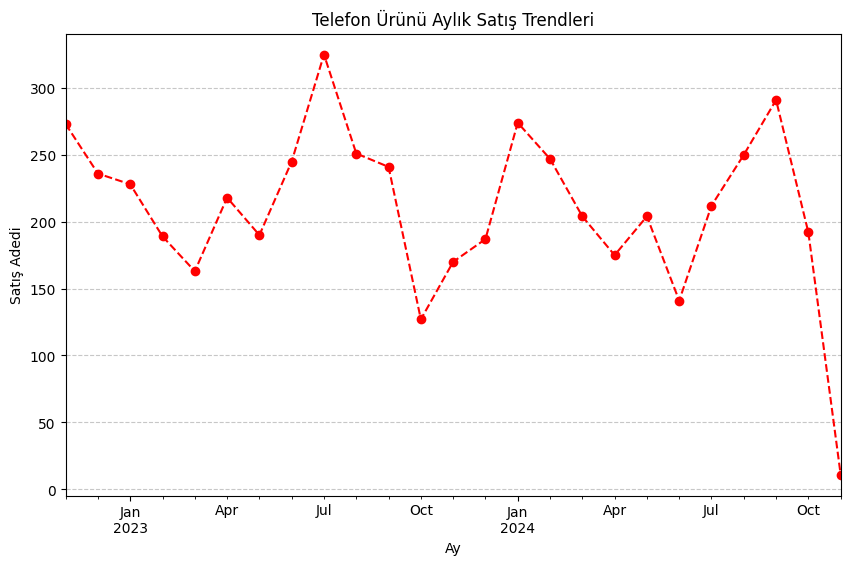

In [125]:
# Telefon ürününe özel analiz
telefon_verisi = satis_verisi[satis_verisi['ürün_adi'] == 'Telefon']

# Zaman bazında satış analizi
telefon_aylik_satis = telefon_verisi.groupby(telefon_verisi['tarih'].dt.to_period('M'))['adet'].sum()

# Görselleştirme
plt.figure(figsize=(10, 6))
telefon_aylik_satis.plot(kind='line', marker='o', color='red', linestyle='--')
plt.title("Telefon Ürünü Aylık Satış Trendleri")
plt.xlabel("Ay")
plt.ylabel("Satış Adedi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Kategorilere Göre Aylık Toplam Satışların Değişim Oranları**


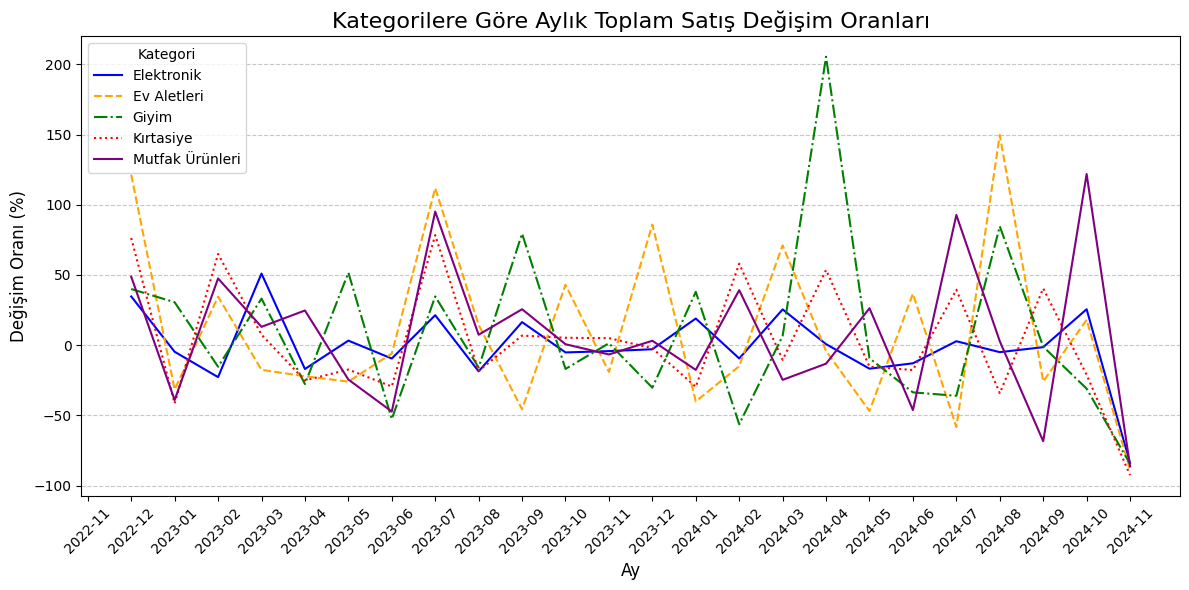

In [126]:
# Aylık bazda kategori satışlarını hesaplama
aylik_kategori_satis = satis_verisi.groupby([satis_verisi['tarih'].dt.to_period('M'), 'kategori'])['toplam_satis'].sum().reset_index()

# Bir önceki ay ile değişim oranını hesaplama
aylik_kategori_satis['toplam_satis_lag'] = aylik_kategori_satis.groupby('kategori')['toplam_satis'].shift(1)
aylik_kategori_satis['degisim_orani'] = ((aylik_kategori_satis['toplam_satis'] - aylik_kategori_satis['toplam_satis_lag']) / aylik_kategori_satis['toplam_satis_lag']) * 100

plt.figure(figsize=(12, 6))

renkler = ['blue', 'orange', 'green', 'red', 'purple']  # Renkler
stiller = ['-', '--', '-.', ':', '-']  # Çizgi stilleri

for i, kategori in enumerate(aylik_kategori_satis['kategori'].unique()):
    plt.plot(
        aylik_kategori_satis[aylik_kategori_satis['kategori'] == kategori]['tarih'].astype(str),
        aylik_kategori_satis[aylik_kategori_satis['kategori'] == kategori]['degisim_orani'],
        label=kategori,
        color=renkler[i % len(renkler)],
        linestyle=stiller[i % len(stiller)]
    )

plt.legend(title="Kategori", loc="upper left")
plt.title("Kategorilere Göre Aylık Toplam Satış Değişim Oranları", fontsize=16)
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Değişim Oranı (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Kategorilere Göre Şehir Analizi**

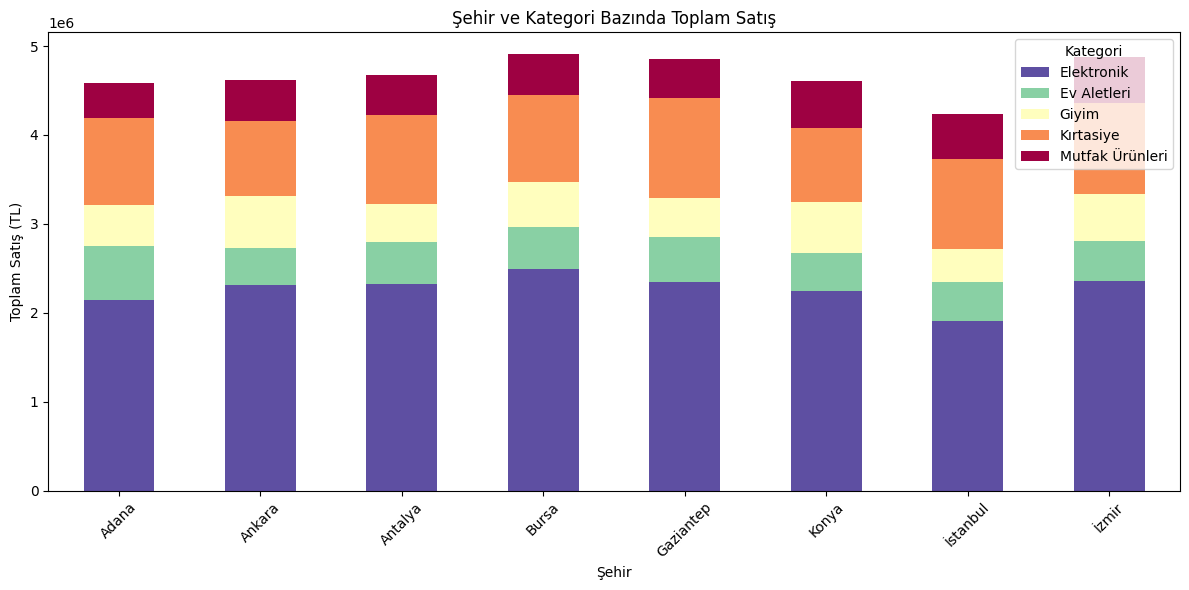

In [129]:
# Şehir ve kategori bazında toplam satış
sehir_kategori_satis = genis_veri_seti.groupby(['sehir', 'kategori'])['toplam_satis'].sum().unstack()

# Görselleştirme
sehir_kategori_satis.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral_r')
plt.title("Şehir ve Kategori Bazında Toplam Satış")
plt.xlabel("Şehir")
plt.ylabel("Toplam Satış (TL)")
plt.xticks(rotation=45)
plt.legend(title="Kategori", loc='upper right')
plt.tight_layout()
plt.show()

## **Görev 5: Bonus**

### **Cohort Analizi (Müşteri Davranış Analizi)**

In [131]:
# Müşteri ve satış verilerini birleştirme
birlesik_veri = musteri_verisi.merge(satis_verisi, on='musteri_id', how='left')

# Tarih sütununu datetime formatına dönüştürme
birlesik_veri['tarih'] = pd.to_datetime(birlesik_veri['tarih'])

# Müşteri bazında ilk alışveriş tarihini belirleme
ilk_alisveris = birlesik_veri.groupby('musteri_id')['tarih'].min().reset_index()
ilk_alisveris.columns = ['musteri_id', 'ilk_alisveris_tarihi']

# İlk alışveriş tarihini satış verisine ekleme
birlesik_veri = birlesik_veri.merge(ilk_alisveris, on='musteri_id')

# Cohort grubunu belirleme (müşterinin ilk alışveriş yaptığı ay)
birlesik_veri['cohort_ay'] = birlesik_veri['ilk_alisveris_tarihi'].dt.to_period('M')

# Satış tarihini de aylık formatta düzenleme
birlesik_veri['satis_ayi'] = birlesik_veri['tarih'].dt.to_period('M')

In [132]:
# Cohort bazında analiz: her cohort'un her ayda kaç farklı müşteri içerdiği
cohort_analizi = birlesik_veri.groupby(['cohort_ay', 'satis_ayi'])['musteri_id'].nunique().reset_index()
cohort_analizi = cohort_analizi.pivot(index='cohort_ay', columns='satis_ayi', values='musteri_id')

# Cohort başlangıcındaki müşteri sayısına göre yüzdesel dağılım
cohort_analizi_pct = cohort_analizi.div(cohort_analizi.iloc[:, 0], axis=0) * 100

müşteri sayısı ham değerler

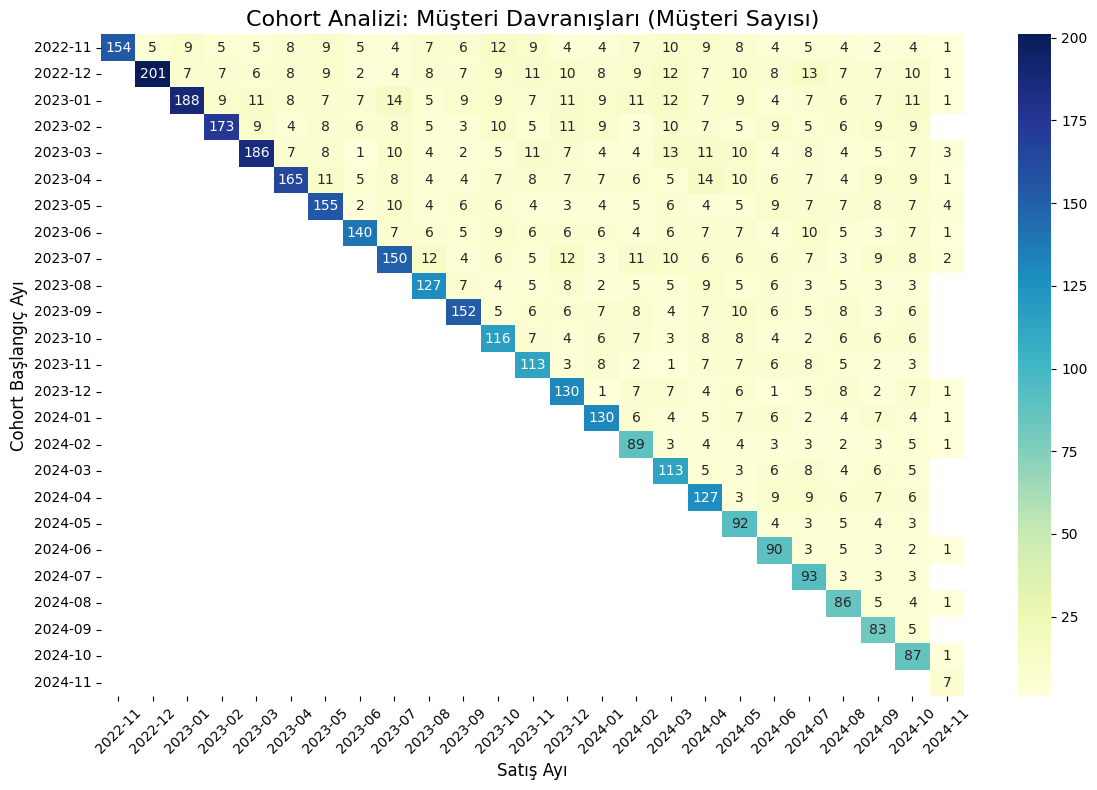

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_analizi, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Cohort Analizi: Müşteri Davranışları (Müşteri Sayısı)", fontsize=16)
plt.xlabel("Satış Ayı", fontsize=12)
plt.ylabel("Cohort Başlangıç Ayı", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

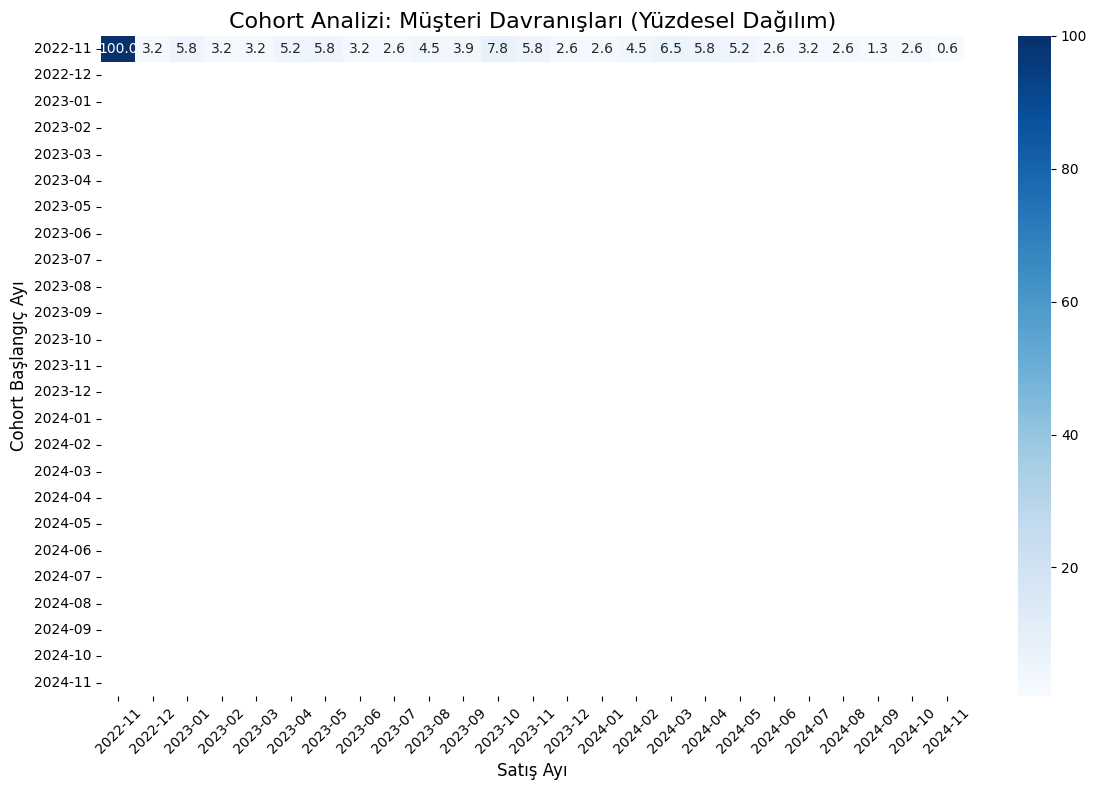

In [134]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_analizi_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Cohort Analizi: Müşteri Davranışları (Yüzdesel Dağılım)", fontsize=16)
plt.xlabel("Satış Ayı", fontsize=12)
plt.ylabel("Cohort Başlangıç Ayı", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

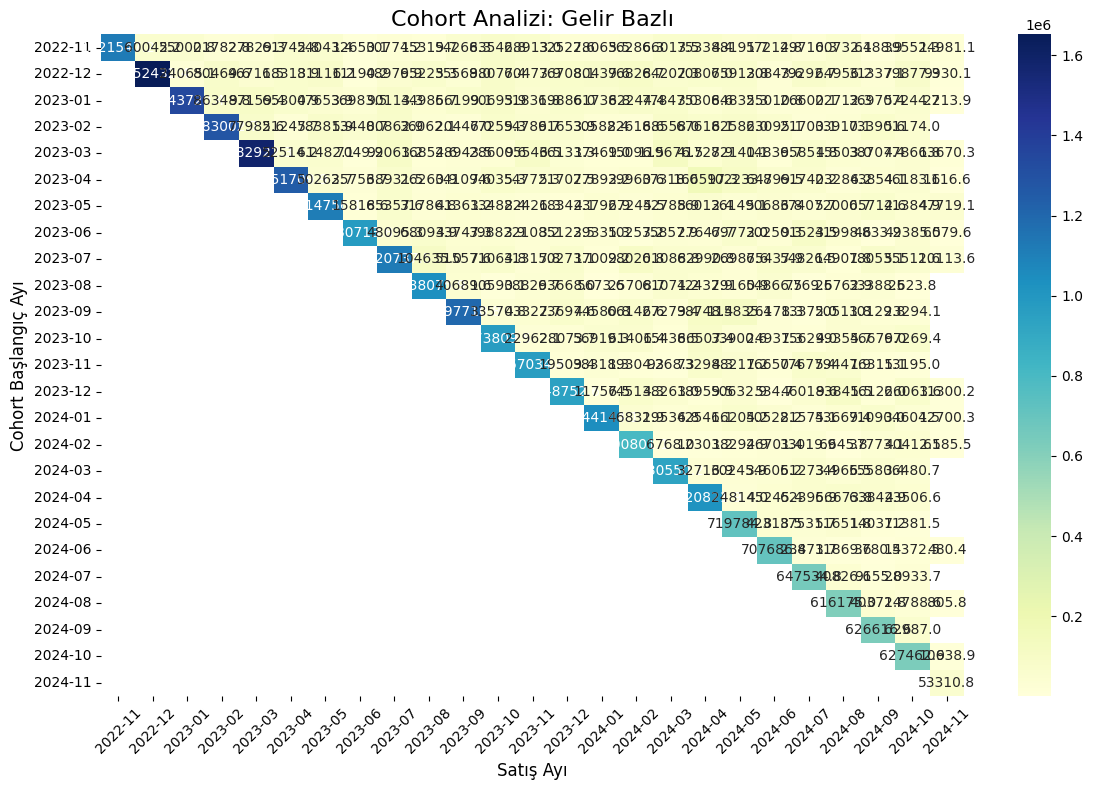

In [135]:
# Cohort bazında toplam gelir analizi
cohort_gelir = birlesik_veri.groupby(['cohort_ay', 'satis_ayi'])['toplam_satis'].sum().reset_index()
cohort_gelir = cohort_gelir.pivot(index='cohort_ay', columns='satis_ayi', values='toplam_satis')

# Gelir analizi için ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_gelir, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cohort Analizi: Gelir Bazlı", fontsize=16)
plt.xlabel("Satış Ayı", fontsize=12)
plt.ylabel("Cohort Başlangıç Ayı", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()